In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean

In [20]:
# Define the ticker symbol
tickerSymbol = 'USD'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end='2024-5-5')

In [21]:
CL = history['Low'].shift(-1) / history['Close'] - 1
print(f'{tickerSymbol} Close to next Low percentiles:')
for q in [0.1,0.2,0.5,0.8,0.9,0.95,0.98,0.99]:
    p = CL.quantile(q)
    print(f'{q:3.0%}: {p:7.2%}')

USD Close to next Low percentiles:
10%: -14.19%
20%: -11.15%
50%:  -5.63%
80%:  -1.31%
90%:   0.10%
95%:   0.97%
98%:   1.85%
99%:   2.75%


In [22]:
print(f'{tickerSymbol} 1w O/L drawdown percentiles:')
for q in [0.1,0.2,0.5,0.8,0.9,0.95,0.98,0.99]:
    p = (history['Low'] / history['Open'] - 1).quantile(q)
    print(f'{q:3.0%}: {p:7.2%}')

USD 1w O/L drawdown percentiles:
10%: -13.89%
20%: -10.79%
50%:  -5.10%
80%:  -1.64%
90%:  -0.82%
95%:  -0.43%
98%:  -0.04%
99%:   0.00%


In [23]:
weeks = 4
option_leverage = 14
gap = (1/80)*100

print(f'period: {weeks} weeks')
print(f'option leverage: {option_leverage:.1f}')
print(f'option gap: {gap:.2f}%')
print(f'break even: {gap+100/option_leverage:.1f}%')

period: 4 weeks
option leverage: 14.0
option gap: 1.25%
break even: 8.4%


In [24]:
history['Stock Change'] = history['Close'].pct_change(periods=weeks) * 100
history['Option Profit'] = history['Stock Change'][weeks:].apply(lambda x: max(-100, (x - gap) * option_leverage - 100))

In [25]:
print(f'{tickerSymbol} {weeks}w option profit percentiles:')
for q in [0.5,0.8,0.9,0.95,0.98,0.99]:
    p = history['Option Profit'].quantile(q)
    print(f'{q:.0%}: {p:3.0f}%')

USD 4w option profit percentiles:
50%: -61%
80%: 154%
90%: 363%
95%: 456%
98%: 516%
99%: 570%


In [26]:
history['Window Max'] = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()


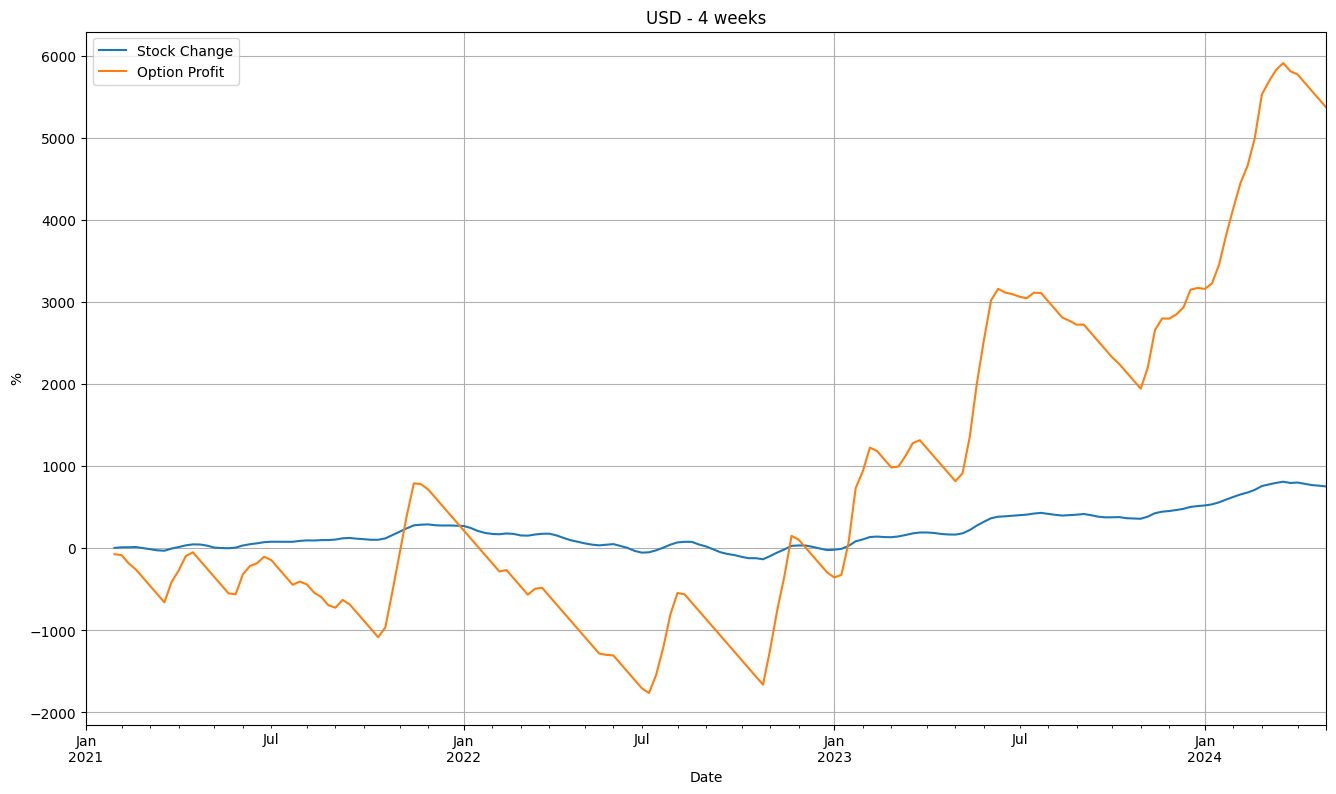

In [28]:
plt.figure(figsize=(16,9))
history['Stock Change'].cumsum().plot()
history['Option Profit'].cumsum().plot()

# plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.ylabel('%')
plt.title(f'{tickerSymbol} - {weeks} weeks')
plt.grid()
plt.show()
